In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import operator
from math import sqrt
from numpy import log

In [2]:
data = scipy.io.loadmat('../data/spamData.mat')

In [3]:
def log_transform(x_array):
    return log(x_array + 0.1)

In [4]:
x_train = data['Xtrain']
x_test = data['Xtest']
y_test = data['ytest']
y_train = data['ytrain']

In [5]:
x_train_log = log_transform(x_train)
x_test_log = log_transform(x_test)

In [6]:
train_set = np.concatenate((x_train_log,y_train),axis=1)
test_set = np.concatenate((x_test_log,y_test),axis=1)

In [7]:
k_range = np.hstack((np.arange(1, 10, 1), np.arange(10, 105, 5)))

In [8]:
def getDistance(testSample, trainSample):
# calculate euclidean distance
    dist= 0
    for j in range(len(testSample)-1):
        dist += pow((testSample[j] - trainSample[j]), 2)
    return sqrt(dist)

In [9]:
def getKNNeighbors(testSample, trainingSet, k):
    distances = []

    for i in range(len(trainingSet)):
        dist = getDistance(testSample, trainingSet[i])
        distances.append((trainingSet[i], dist))
    distances.sort(key=operator.itemgetter(1))
    
    knn = []
    for x in range(k):
        knn.append(distances[x][0])
    return knn

In [10]:
def spamPredict(neighbors):
    k_spam = 0
    for i in range(len(neighbors)):
        k_spam += neighbors[i][-1]
    
    spam_prob = k_spam/len(neighbors)
    clean_prob = 1 - spam_prob
    
    if spam_prob > clean_prob:
        return 1
    else:
        return 0

In [11]:
def errorRate(testSet, predictions):
    error_num = 0
    for x in range(len(testSet)):
        if testSet[x][-1] != predictions[x]:
            error_num += 1
    return error_num / len(testSet)

In [12]:
def knnError(testSet, trainSet, k):
    y_predict =[]
    for i in range(len(testSet)):    
        neighbors = getKNNeighbors(testSet[i], trainSet, k)
        prediction = spamPredict(neighbors)
        y_predict.append(prediction)
        
    error_rate = errorRate(testSet, y_predict)
    return error_rate

In [13]:
knnError(test_set, train_set, 1)

0.06380208333333333

In [14]:
knnError(train_set, train_set, 1)

0.0003262642740619902

In [15]:
for k in [1, 10, 100]:
    
    train_error = knnError(train_set, train_set, k)
    print("Error rate for training set when k=%s is:" % k, train_error)
    test_error = knnError(test_set, train_set, k)
    print("Error rate for test set when k=%s is: " % k, test_error)
    print()

Error rate for training set when k=1 is: 0.0003262642740619902
Error rate for test set when k=1 is:  0.06380208333333333

Error rate for training set when k=10 is: 0.053833605220228384
Error rate for test set when k=10 is:  0.06510416666666667

Error rate for training set when k=100 is: 0.08841761827079934
Error rate for test set when k=100 is:  0.087890625



In [16]:
train_error_rate = []
test_error_rate = []

for k in k_range:

    train_error = knnError(train_set, train_set, k)
    train_error_rate.append(train_error)
    
    test_error = knnError(test_set, train_set, k)
    test_error_rate.append(test_error)

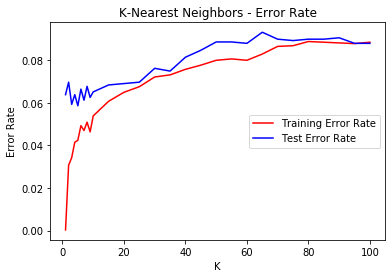

In [17]:
plt.figure(1)
plt.plot(k_range, train_error_rate, color='r', label='Training Error Rate')
plt.plot(k_range, test_error_rate, color='b', label='Test Error Rate')
plt.title('K-Nearest Neighbors - Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend(loc=5)
plt.show()